## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_combined = mouse_metadata.merge(study_results, on='Mouse ID', how='outer')

# Display the data table for preview
study_combined.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [3]:
# Checking the number of mice.
study_group = study_combined['Mouse ID'].unique()
len(study_group)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = study_combined.loc[study_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse = study_combined.loc[study_combined['Mouse ID'] == 'g989']
mouse.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_cleaned = study_combined.loc[study_combined['Mouse ID'] != 'g989']
study_cleaned.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [8]:
# Checking the number of mice in the clean DataFrame.
c_study_group = study_cleaned['Mouse ID'].unique()
len(c_study_group)

248

## Summary Statistics

In [7]:
study_regimens = study_cleaned['Drug Regimen'].unique()
study_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# use for loop to iterate through each drug, add to 

# r_mean_a = np.mean(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
# r_median_a = np.median(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
# r_var_a = np.var(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
# r_std_a = np.std(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])
# r_sem_a = st.sem(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'])

# c_mean_a = np.mean(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])
# c_median_a = np.median(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])
# c_var_a = np.var(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])
# c_std_a = np.std(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])
# c_sem_a = st.sem(study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'])

# stats_a = pd.DataFrame ({
#     'Ramicane' : ({'Mean':r_mean_a, 'Median':r_median_a, 'Variance':r_var_a, 'Standard Deviation':r_std_a, 'SEM':r_sem_a}),
#     'Capomulin' :({'Mean':c_mean_a, 'Median':c_median_a, 'Variance':c_var_a, 'Standard Deviation':c_std_a, 'SEM':c_sem_a}),
# })
# stats_a

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

r_mean = study_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
r_median = study_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
r_var = study_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
r_std = study_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
r_sem = study_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
stats = pd.DataFrame ({
    'Mean' :  r_mean,
    'Median' : r_median,
    'Variance' : r_var,
    'Standard Deviation' : r_std,
    'SEM' : r_sem,
})
stats

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df = study_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

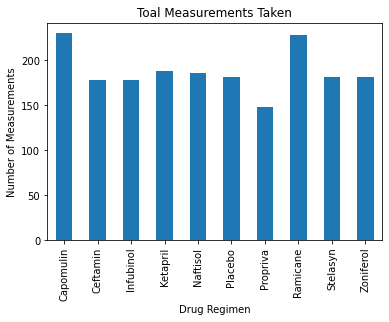

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure = study_cleaned.groupby('Drug Regimen')['Mouse ID'].count()

measure_plot = measure.plot.bar()
measure_plot.set_title('Toal Measurements Taken')
measure_plot.set_xlabel('Drug Regimen')
measure_plot.set_ylabel('Number of Measurements')
plt.show()

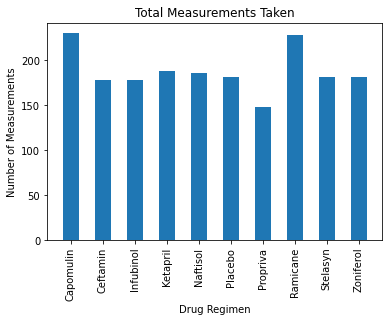

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure = study_cleaned.groupby('Drug Regimen')['Mouse ID'].count()
x_axis = list(measure.index)
measure = measure.to_numpy()

plt.bar(x_axis, measure, width=.5)
plt.xticks(rotation = 'vertical')

plt.title("Total Measurements Taken")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

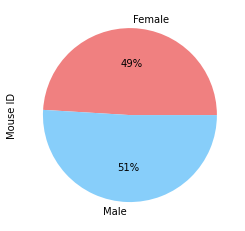

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = study_cleaned.groupby('Sex')['Mouse ID'].count()
gender.plot.pie(colors=['lightcoral','lightskyblue'], autopct='%1.0f%%')
plt.show()

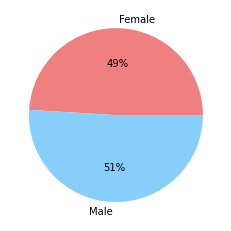

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# NEED MOUSE ID label?
gender = study_cleaned.groupby('Sex')['Mouse ID'].count()
labels = list(gender.index)
gender = gender.to_numpy()
colors = ['lightcoral', 'lightskyblue']

plt.pie(gender, labels = labels, colors = colors, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last = study_cleaned.loc[study_cleaned['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
last_time = last.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = study_cleaned.merge(last_time, on = ['Mouse ID', 'Timepoint'])
merged

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
1            23.343598                 1  
2            28.484033                 0  
3            28.430964                 1  
4            29.128472                 1  
..                 ...               ...  
95           61.386660                 3  
96           67.685569                 3  
97           68.594745                 4  
98           64.729837                 3  
99           62.754451                 3  

[100 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

tumor_vol =merged["Tumor Volume (mm3)"]
tumor_vol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of the tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
outlier_occupancy
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#     for treatment in treatments:

    
    # add subset 
#     subset = df.iloc[]
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of the tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [76]:
capo = study_cleaned.loc[study_cleaned['Mouse ID'] == 's185']
capo

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

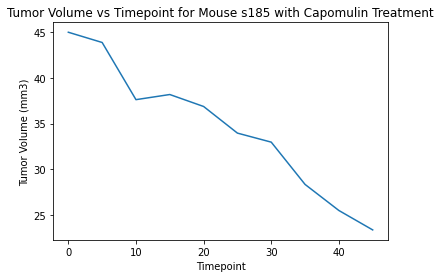

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = capo['Timepoint']
y_axis = capo['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Tumor Volume vs Timepoint for Mouse s185 with Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

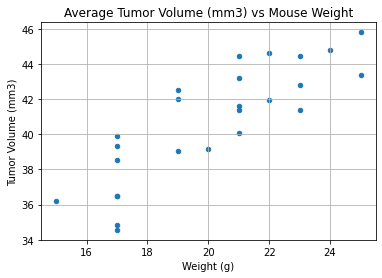

In [146]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_1 = study_cleaned.loc[study_cleaned['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
mouse_2 = mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_m = mouse_1.merge(mouse_2, on='Mouse ID')
mouse_c = mouse_m.drop(columns = ['Tumor Volume (mm3)_x'])
mouse_c = mouse_c.drop_duplicates()
mouse_final = mouse_c.rename(columns = {'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)'})

mouse_final.plot(kind = 'scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, 
                   title = 'Average Tumor Volume (mm3) vs Mouse Weight')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# from ? output df, use that data here

# var = df.iloc[:,col]
# var2 = df.iloc[:,col]
# correlation = st.pearsonr(var,var2)
# plt.scatter(var,var2)
# plt.xlabel('Var')
# plt.ylabel('Var2')
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()




In [156]:
tumor = study_combined.loc[study_combined['Drug Regimen'] == 'Capomulin']
tumor
# tumor_volume = tumor.loc[tumor['Mouse ID'],[['Tumor Volume (mm3)']]].mean()
# tumor_volume

# x_values = tumor['Weight (g)']
# y_values = tumor['tumor_voume']
# t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Weight (g)')
# plt.ylabel('Tumor Volume (mm3)')

# print(f"The r-squared is: {rvalue**2}")
# plt.show()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496                 0  
12             37.614948                 0  
13             38.177232                 0  
14             36.866876                 0  
...                  ...               ...  
440            47.685963                 1  
1452           45.000000                 0  
1453           45.597064                 0  
1454           46.059608                 0  
1455           46.539206                 0  

[230 rows x 8 columns]